# Tesserct
<a href="https://yunwoong.tistory.com/51" target="_blank" title="[ Python ] Tesseract, PyTesseract 설치방법 (OCR 개발환경)" rel="nofollow"><img src="https://user-images.githubusercontent.com/69428232/148317569-75486c74-24f0-44d9-864d-3a6129d8fe87.png" height="200" title="Tesseract" alt="Tesseract"></img></a> 

테서랙트(Tesseract)는 다양한 운영 체제를 위한 광학 문자 인식 엔진입니다. 이 소프트웨어는 Apache License, 버전 2.0에 따라 배포되는 무료 소프트웨어이며 2006년부터 Google에서 개발을 후원했습니다. Tesseract는 1995년 문자 정확도 측면에서 3대 OCR 엔진에 속했으며 Linux, Windows 및 Mac OS X에서 사용할 수 있습니다.

버전 2 이하의 Tesseract에서는 간단한 단일 열 텍스트의 TIFF 이미지만 입력으로 허용했었고, Version 3 부터 Tesseract는 출력 텍스트 형식, hOCR 위치 정보 및 페이지 레이아웃 분석을 지원하게 되었고 Leptonica 라이브러리를 사용하여 여러 가지 새로운 이미지 형식에 대한 지원이 추가되었습니다. 

현재는 많은 언어 및 스크립트에 대한 LSTM 기반 OCR 엔진 및 모델이 추가되어 총 116개의 언어가 제공됩니다.

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks'
/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## 1. Install Tesseract

In [4]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,728 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

### 버전 확인

In [5]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.79.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 2.0.3) : libpng 1.6.37 : libtiff 4.1.0 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.1
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.4.0 zlib/1.2.11 liblzma/5.2.4 bz2lib/1.0.8 liblz4/1.9.2 libzstd/1.4.4


### install language (언어 설치)

Ex) Kor

```sudo apt-get install tesseract-ocr-kor```

EX) All languages

```sudo apt-get install tesseract-ocr-all```

In [6]:
!sudo apt-get install tesseract-ocr-kor tesseract-ocr-lao

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-kor tesseract-ocr-lao
0 upgraded, 2 newly installed, 0 to remove and 22 not upgraded.
Need to get 3,460 kB of archives.
After this operation, 8,095 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-kor all 1:4.00~git30-7274cfa-1 [1,051 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-lao all 1:4.00~git30-7274cfa-1 [2,408 kB]
Fetched 3,460 kB in 2s (2,181 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to

### 사용가능한 언어 목록 확인하는 명령어

In [7]:
!tesseract --list-langs

List of available languages (4):
eng
kor
lao
osd


## 2. Install PyTesseract
Tesseract OCR 엔진 설치가 완료되었고, OCR, 컴퓨터 비전 및 이미지 처리를 수행하는 데 필요한 필수 Python 패키지를 설치합니다.

In [8]:
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


```WARNING: The following packages were previously imported in this runtime:```

```  [PIL]```

```  You must restart the runtime in order to use newly installed versions.```

메세지가 나왔다면 설치된 버전을 사용을 위해 ***런타임 재시작이 필요***

## 3. Google Drive Mount / Test Image Load
이미지가 존재하는 Google Drive Mount

*편의를 위해 URL로 이미지를 Load 하여 수행하겠습니다*

In [6]:
import cv2

In [7]:
import requests
import numpy as np


## 4. Recognition

In [8]:
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

In [9]:
from google.colab.patches import cv2_imshow
img_path = '/content/drive/MyDrive/Colab Notebooks/laoimg.jpg'

img = cv2.imread(img_path,cv2.IMREAD_COLOR)
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

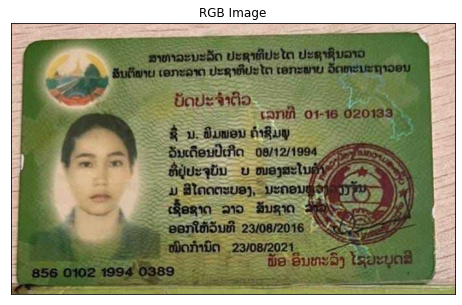

In [10]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 1, 1)
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.xticks([]), plt.yticks([])

plt.show()

In [11]:
#전체 테스트
text = pytesseract.image_to_string(rgb_image, lang='lao')
print(text)

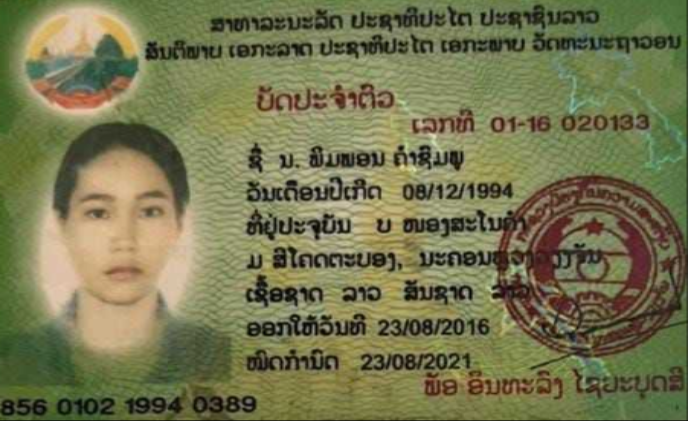

In [12]:
#테스트 윤곽선
def preprocess_card(img):
    # 그레이스케일 변환
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 이진화 적용
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 가우시안 블러 적용
    blur = cv2.GaussianBlur(thresh, (5,5), 0)

    # 캐니 에지 검출 적용
    canny = cv2.Canny(blur, 50, 150)

    # 모폴로지 연산 적용
    kernel = np.ones((5,5), np.uint8)
    morph = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)

    # 윤곽선 검출
    contours, hierarchy = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 윤곽선 중에서 가장 큰 윤곽선 찾기
    max_contour = None
    max_contour_area = 0
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        if contour_area > 5000 and contour_area > max_contour_area:
            max_contour = contour
            max_contour_area = contour_area

    # 윤곽선으로부터 x, y, w, h 좌표 계산
    x, y, w, h = cv2.boundingRect(max_contour)

    # 이미지 crop
    card = img[y:y+h, x:x+w]
    
    # 좌우상하 여백을 좀 더 잘라줌
    card = card[int(h*0.05):int(h*0.95), int(w*0.05):int(w*0.95)]
    
    # perspective transform
    pts1 = np.float32([[0, 0], [0, h], [w, h], [w, 0]])
    pts2 = np.float32([[0, 0], [0, 500], [500, 500], [500, 0]])
    M = cv2.getPerspectiveTransform(pts1, pts2)
    transformed = cv2.warpPerspective(card, M, (500, 500))

    # 여백 제거
    transformed_gray = cv2.cvtColor(transformed, cv2.COLOR_BGR2GRAY)
    _, transformed_thresh = cv2.threshold(transformed_gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(transformed_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    transformed_cropped = transformed[y:y+h, x:x+w]

    return transformed_cropped

transformed_cropped = preprocess_card(img)
resized = cv2.resize(transformed_cropped, (img.shape[1], img.shape[0]))
cv2_imshow(resized)

In [13]:
# laoimg3 이미지의 텍스트영역 전체공간
# x1, y1 = 160, 100
# x2, y2 = 400, 260

#생년월일영역
# x1, y1 = 150, 120
# x2, y2 = 360, 150

#사진영역
# x1, y1 = 17, 80
# x2, y2 = 170, 260

#생년월일숫자영역
# x1, y1 = 270, 120
# x2, y2 = 360, 150
# ROI 지정

#이름영역
# x1, y1 = 160, 100
# x2, y2 = 400, 125

# roi = img[y1:y2, x1:x2]

# 추출된 영역 저장
# cv2.imwrite('roi.jpg', roi)

In [14]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [15]:
#신분증 번호영역
x7, y7 = 400, 80
x8, y8 = 680, 145
roi4 = resized[y7:y8, x7:x8]

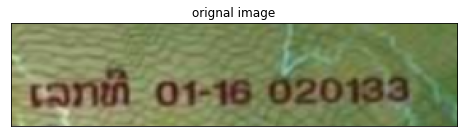

ເລກທີ 01-18 020183 ;;



In [16]:
plt_imshow("orignal image", roi4)
rgb_image = cv2.cvtColor(roi4, cv2.COLOR_BGR2RGB)
text = pytesseract.image_to_string(rgb_image, lang='lao')
print(text)



In [9]:
pip install pororo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.1/256.1 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 KB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.8/748.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 K

In [17]:
#숫자값은 기존에 태서렉트로 잘 읽히지 않아 뽀로로 라이브러리 사용
from pororo import Pororo
import re

ocr = Pororo(task="ocr", lang="ko")
result = ocr(roi4)
extracted_text = re.findall(r'\d+-\d+ \d+', result[0])
print(extracted_text[0])

AttributeError: ignored

In [ ]:
# #이름영역
# x1, y1 = 190, 138
# x2, y2 = 530, 180
# roi = resized[y1:y2, x1:x2]

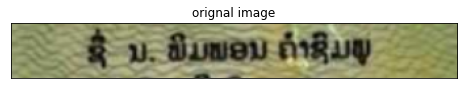

ຊື່ ນ. ພິມພອນ ຄໍາຊົມພູ

 



In [ ]:
# plt_imshow("orignal image", roi)
# rgb_image = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
# text = pytesseract.image_to_string(rgb_image, lang='lao')
# print(text)

In [ ]:
# #생년월일영역
# x3, y3 = 190, 170
# x4, y4 = 530, 210
# roi2 = resized[y3:y4, x3:x4]

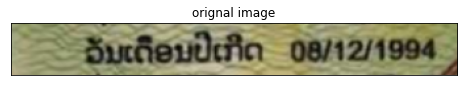

ວັນເດືອນປີເກີດ 08/12/1994 ,



In [ ]:
# plt_imshow("orignal image", roi2)
# rgb_image = cv2.cvtColor(roi2, cv2.COLOR_BGR2RGB)
# text = pytesseract.image_to_string(rgb_image, lang='lao')
# print(text)

In [ ]:
# #파일명 저장(현재날짜,현재시간)
# import os
# from datetime import datetime

# def save_roi_image(roi, save_dir):
#     now_str = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
#     filename = f"{now_str}.jpg"
#     filepath = os.path.join(save_dir, filename)
#     cv2.imwrite(filepath, roi)

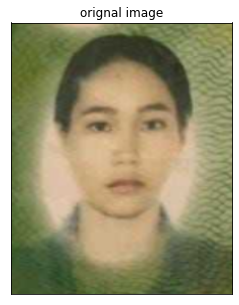

In [ ]:

# #사진영역
# x5, y5 = 10, 110
# x6, y6 = 230, 380
# roi3 = resized[y5:y6, x5:x6]
# plt_imshow("orignal image", roi3)
# # 추출된 영역 저장
# # save_roi_image(roi3,"/content/drive/MyDrive/Colab Notebooks/LAO")


# img_path=resized

In [ ]:
# def preprocess_image(resized):
#     # # 이미지 불러오기
#     # img = cv2.imread(resized,cv2.IMREAD_COLOR)
#     # rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     # 사진 영역 추출
#     photo_roi = resized[110:380, 10:230]

#     # 이름 영역 추출
#     name_roi = resized[138:180, 190:530]
#     name_text = pytesseract.image_to_string(name_roi, lang='lao')
    
#     # 생년월일 영역 추출
#     dob_roi = resized[170:210, 190:530]
#     dob_text = pytesseract.image_to_string(dob_roi, lang='lao')
    
#     return [photo_roi, name_text, dob_text]

# print("이름: "+preprocess_image(resized)[1])
# print("생년월일: "+preprocess_image(resized)[2])

이름: ຊື່ ນ. ພິມພອນ ຄໍາຊົມພູ

 

생년월일: ວັນເດືອນປີເກີດ 08/12/1994 ,



In [ ]:
# print("이름: "+preprocess_image(img_path)[1])

이름: ຊື່ ນ. ພິມພອນ ຄໍາຊົມພູ .



In [ ]:
# print("생년월일: "+preprocess_image(img_path)[2])

생년월일: ວັນເດືອນປີເກີດ 08/12/1994 .



In [ ]:
# import re

# dob_text = preprocess_image(resized)[2]  # 생년월일 텍스트 추출

# # 정규표현식사용, 생년월일에서 날짜만 추출
# match = re.search(r"\d{2}/\d{2}/\d{4}", dob_text)
# if match:
#     dob = match.group()
#     print("생년월일: " + dob)
#     print("ວັນເດືອນປີເກີດ: " + dob)
# else:
#     print("날짜를 찾을 수 없습니다.")

생년월일: 08/12/1994
ວັນເດືອນປີເກີດ: 08/12/1994


In [11]:
!pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 25.9 MB/s eta 0:00:00


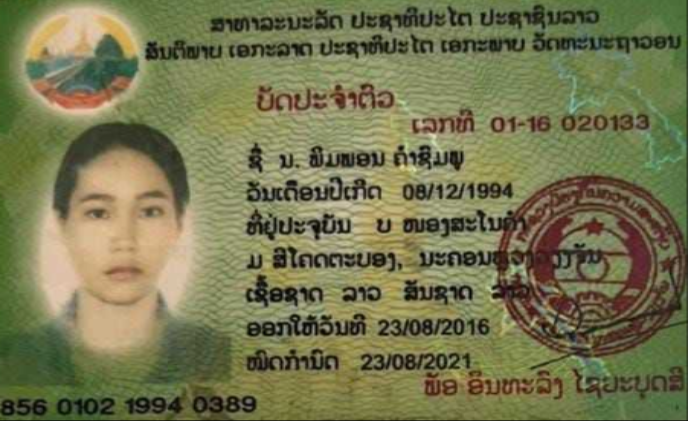

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


1 record(s) db성공.


In [13]:
import mysql.connector
import datetime
import cv2
import pytesseract
import re
from pororo import Pororo
from google.colab.patches import cv2_imshow
import numpy as np
# MySQL 연결 생성
mydb = mysql.connector.connect(
  host= "project-db-stu.ddns.net",
  user= "campus_h_1024_6",
  password= "smhrd6",
  port= "3307",
  database= "campus_h_1024_6",
)

# 커서 생성
mycursor = mydb.cursor()

#현재날짜,시간값
# now = datetime.datetime.now()

# 이미지 경로
img_path = '/content/drive/MyDrive/Colab Notebooks/laoimg.jpg'
img = cv2.imread(img_path,cv2.IMREAD_COLOR)
def preprocess_card(img):
    # 그레이스케일 변환
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 이진화 적용
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 가우시안 블러 적용
    blur = cv2.GaussianBlur(thresh, (5,5), 0)

    # 캐니 에지 검출 적용
    canny = cv2.Canny(blur, 50, 150)

    # 모폴로지 연산 적용
    kernel = np.ones((5,5), np.uint8)
    morph = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)

    # 윤곽선 검출
    contours, hierarchy = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 윤곽선 중에서 가장 큰 윤곽선 찾기
    max_contour = None
    max_contour_area = 0
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        if contour_area > 5000 and contour_area > max_contour_area:
            max_contour = contour
            max_contour_area = contour_area

    # 윤곽선으로부터 x, y, w, h 좌표 계산
    x, y, w, h = cv2.boundingRect(max_contour)

    # 이미지 crop
    card = img[y:y+h, x:x+w]
    
    # 좌우상하 여백을 좀 더 잘라줌
    card = card[int(h*0.05):int(h*0.95), int(w*0.05):int(w*0.95)]
    
    # perspective transform
    pts1 = np.float32([[0, 0], [0, h], [w, h], [w, 0]])
    pts2 = np.float32([[0, 0], [0, 500], [500, 500], [500, 0]])
    M = cv2.getPerspectiveTransform(pts1, pts2)
    transformed = cv2.warpPerspective(card, M, (500, 500))

    # 여백 제거
    transformed_gray = cv2.cvtColor(transformed, cv2.COLOR_BGR2GRAY)
    _, transformed_thresh = cv2.threshold(transformed_gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(transformed_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    transformed_cropped = transformed[y:y+h, x:x+w]

    return transformed_cropped

transformed_cropped = preprocess_card(img)
resized = cv2.resize(transformed_cropped, (img.shape[1], img.shape[0]))
cv2_imshow(resized)

# 이미지 전처리 함수
def preprocess_image(resized):
    
    # 사진 영역 추출
    photo_roi = resized[110:380, 10:230]
    blob_data = cv2.imencode('.jpg', photo_roi)[1].tobytes()
    #신분증 번호 영역 추출
    per_roi = resized[80:145,400:680]
    ocr = Pororo(task="ocr", lang="ko")
    result = ocr(per_roi)
    extracted_text = re.findall(r'\d+-\d+ \d+', result[0])
    # print(extracted_text[0])

    # 이름 영역 추출
    name_roi = resized[138:180, 190:530]
    name_text = pytesseract.image_to_string(name_roi, lang='lao')
    # print("이름:"+name_text)
    # 생년월일 영역 추출
    dob_roi = resized[170:210, 190:530]
    dob_text = pytesseract.image_to_string(dob_roi, lang='lao')


    # 정규표현식사용, 생년월일에서 날짜만 추출
    match = re.search(r"\d{2}/\d{2}/\d{4}", dob_text)
    if match:
        dob = match.group()
        # print("생년월일: " + dob)
        # print("ວັນເດືອນປີເກີດ: " + dob)
    else:
        print("날짜를 찾을 수 없습니다.")
    
    return [blob_data, extracted_text[0] ,name_text, dob]

# 이미지 전처리 후 데이터베이스에 삽입
data = preprocess_image(resized)
sql = "INSERT INTO my_table2 (id,p_id, birthday,image) VALUES (%s, %s, %s, %s)"
val = (data[1], data[2],data[3],data[0])
mycursor.execute(sql, val)

# 데이터베이스 변경 사항 저장
mydb.commit()

# 결과 출력
if mycursor.rowcount > 0:
    print(mycursor.rowcount, "record(s) db성공.")
else:
    print("db실패.")

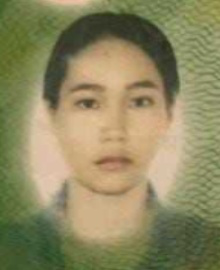

In [ ]:
#저장된 이미지 확인
import mysql.connector
# from PIL import Image
import io

# MySQL 연결
mydb = mysql.connector.connect(
  host= "project-db-stu.ddns.net",
  user= "campus_h_1024_6",
  password= "smhrd6",
  port= "3307",
  database= "campus_h_1024_6",
)

# 커서 생성
mycursor = mydb.cursor()

# BLOB 형식으로 저장된 이미지 불러오기
sql = "SELECT image FROM my_table2 WHERE id = %s"
val = ('01-16 020133',)
mycursor.execute(sql, val)
result = mycursor.fetchone()

# 이미지 불러오기
image = Image.open(io.BytesIO(result[0]))
image.show()